In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
BATCH_START = 0
TIME_STEPS = 20#横轴一个batch取20步进行研究，看sin是怎么接近cos
BATCH_SIZE = 50
INPUT_SIZE = 1#输入的XY一一对应
OUTPUT_SIZE = 1#被预测的XY也一一对应
CELL_SIZE = 20
LR = 0.006

In [3]:
def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    # plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
    # plt.show()
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

In [4]:
model = Sequential()
# build a LSTM RNN
model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,跟以前的是一样的
    output_dim=CELL_SIZE,
    return_sequences=True,      # 回归，不是分类，要修改参数True: output at all steps. False: output as last step.默认等于false，对于每一个时间点要不要输出对应的output，分类的时候读取了28行，最后一个时刻才输出
    stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2，默认等于false，是说batch之间是否有联系。第一个图片产生一个描述状态，与下一个没有联系，而回归是有的
))
# add output layer
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))#上个例子直接加了dense layer因为是只对最后一个output进行全连接。因为这里对于每一个output都有关系，所以对每一个都要全连接计算
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='mse',)

C:\Users\zhang\AppData\Local\Continuum\anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(50, 20, 1..., return_sequences=True, stateful=True, units=20)`
  import sys


Training ------------
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










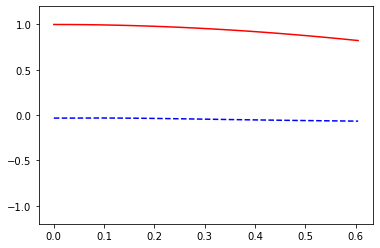

train cost:  0.5094064


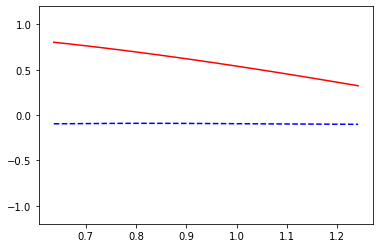

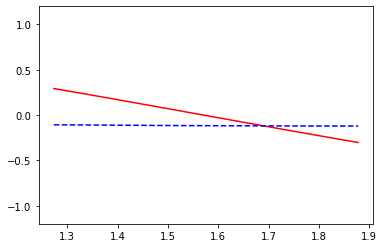

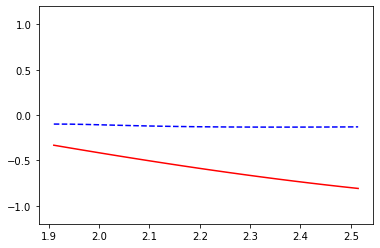

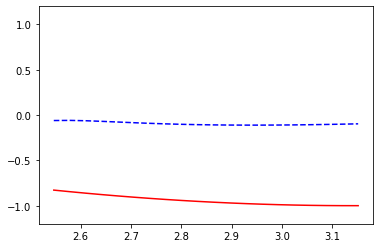

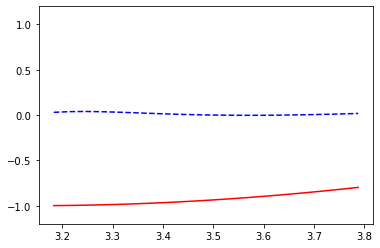

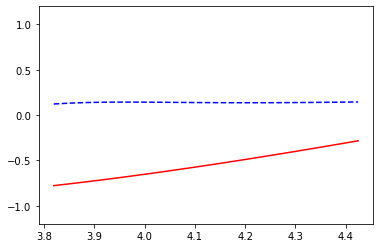

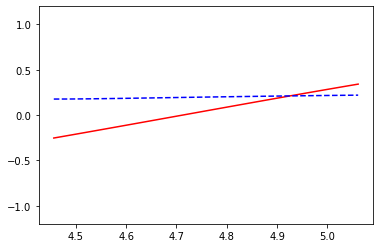

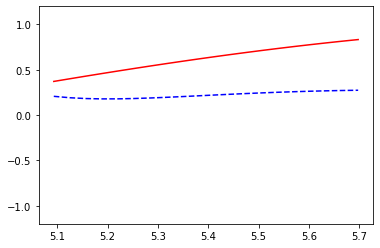

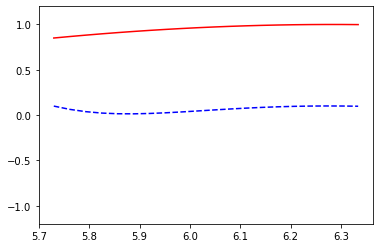

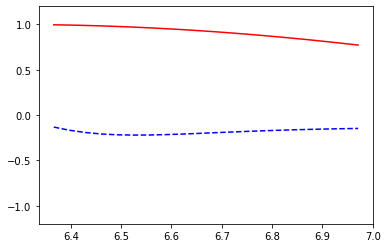

train cost:  0.3635472


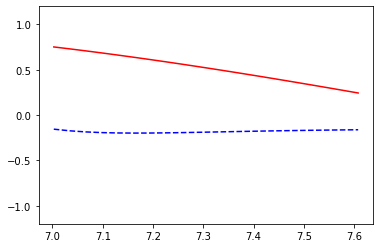

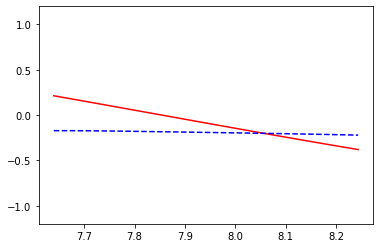

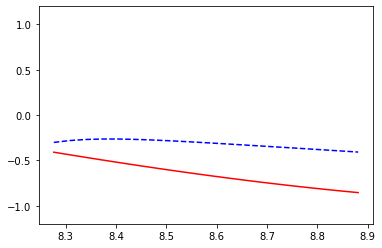

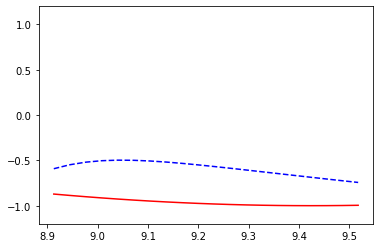

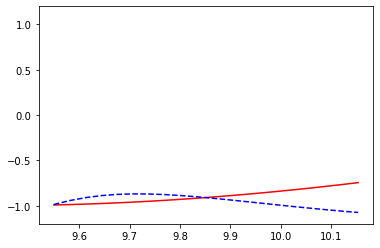

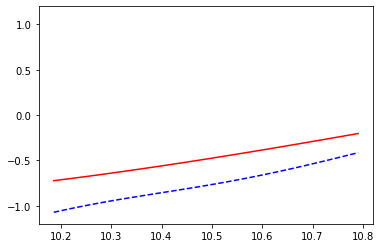

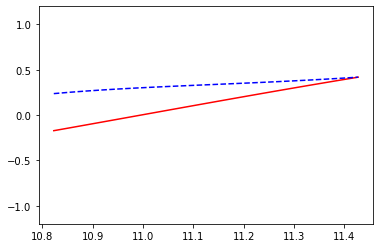

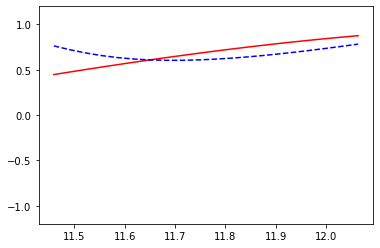

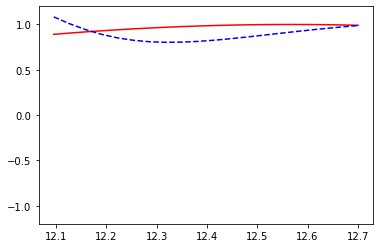

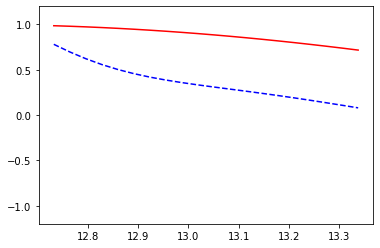

train cost:  0.062080402


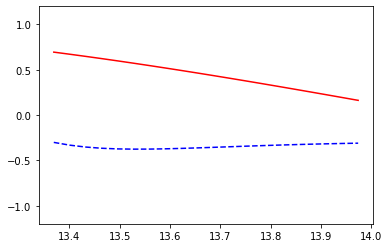

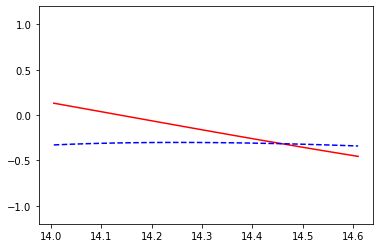

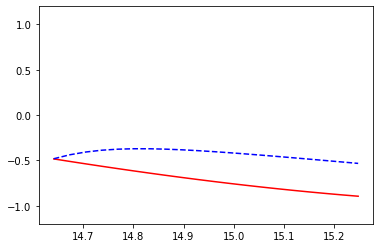

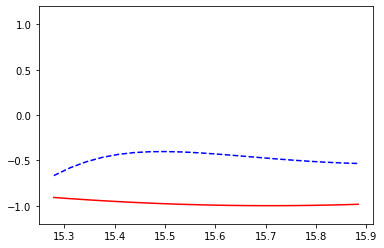

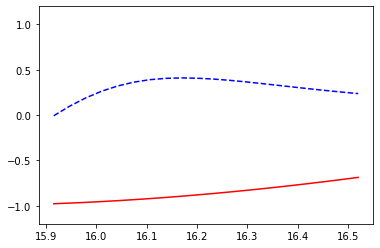

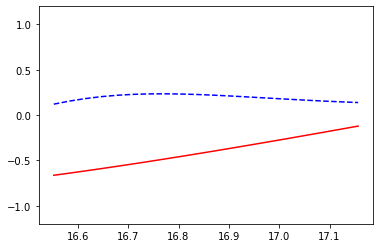

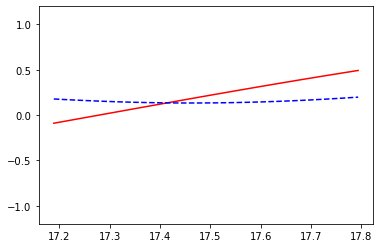

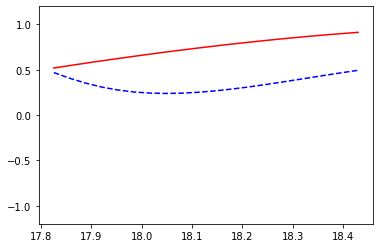

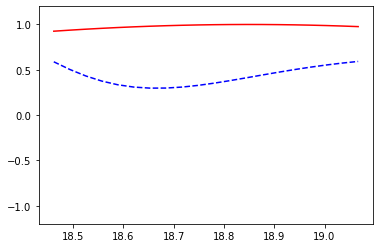

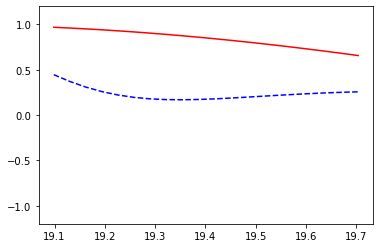

train cost:  0.11722541


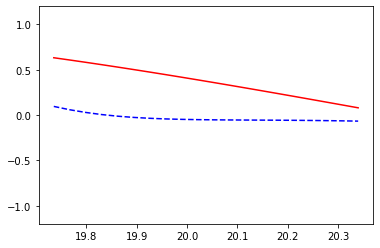

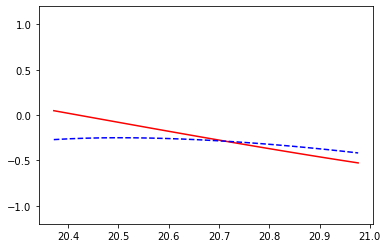

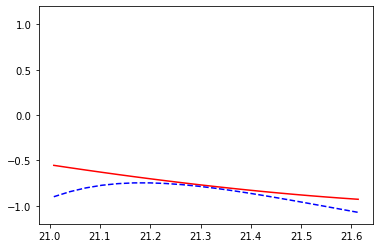

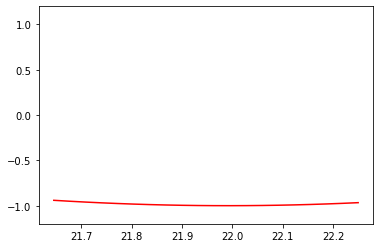

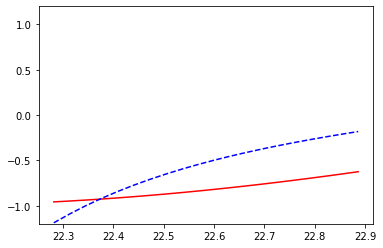

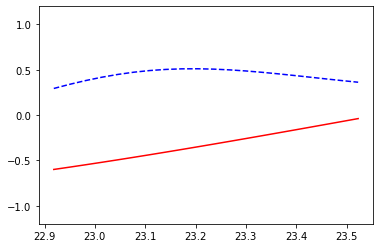

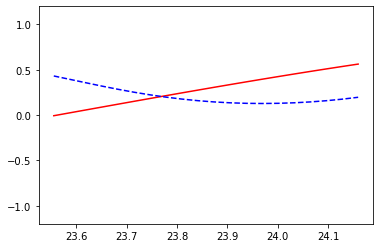

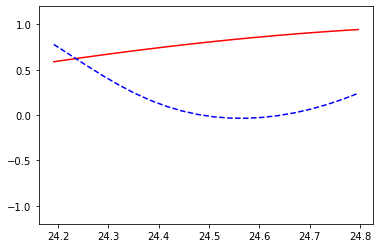

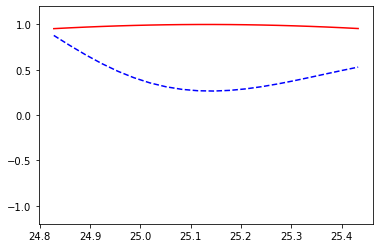

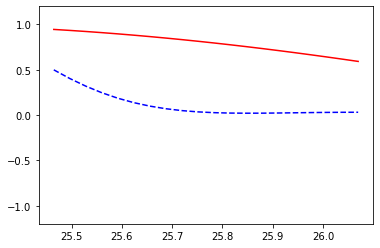

train cost:  0.10067912


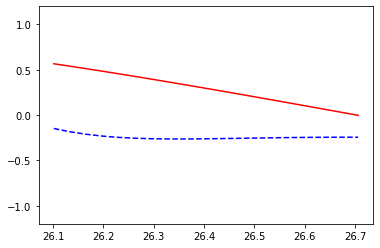

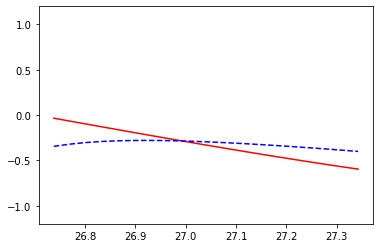

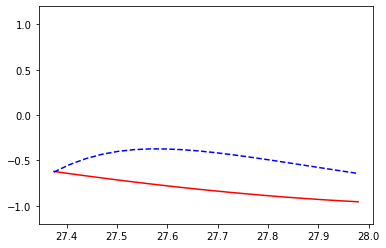

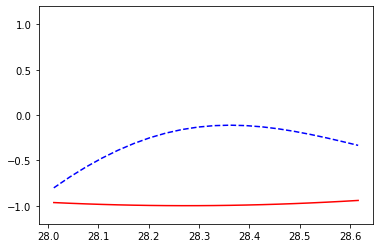

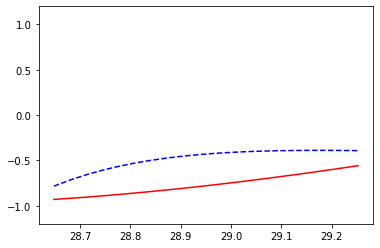

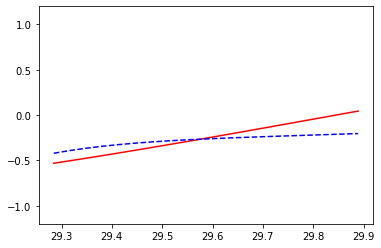

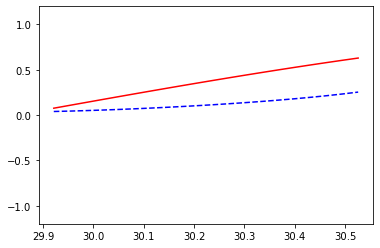

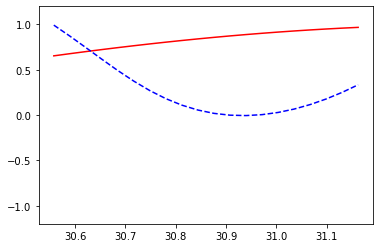

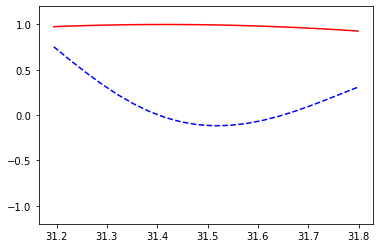

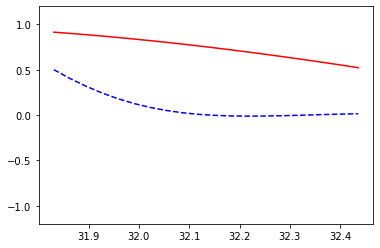

train cost:  0.09417432


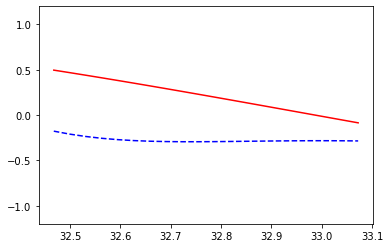

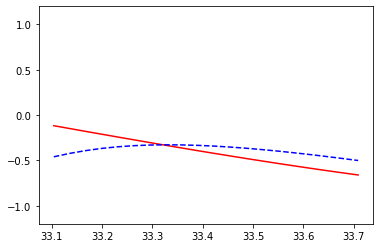

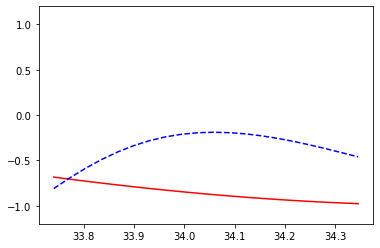

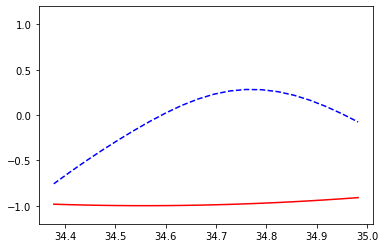

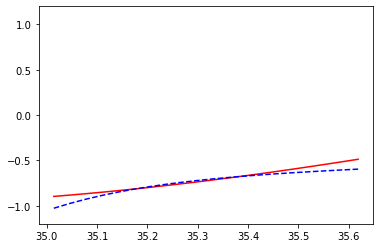

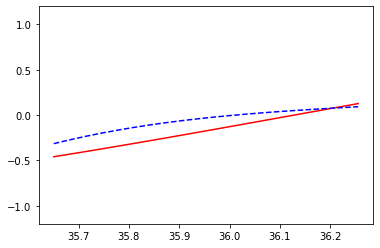

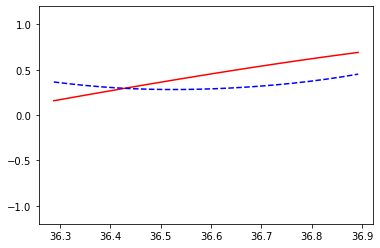

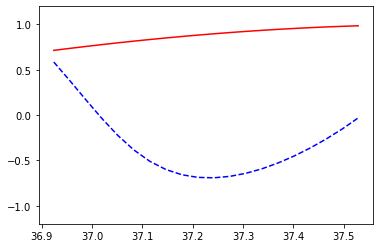

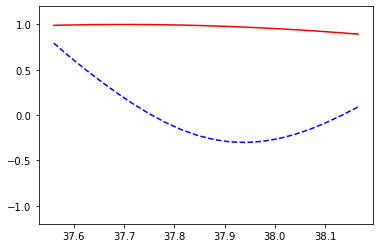

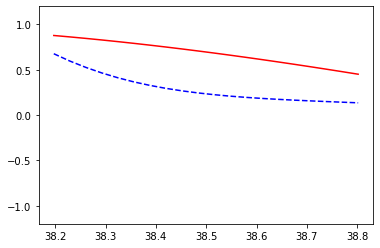

train cost:  0.06313301


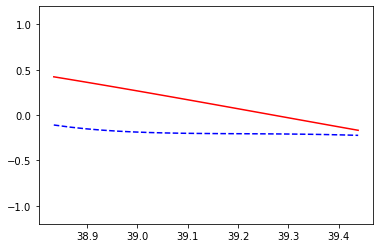

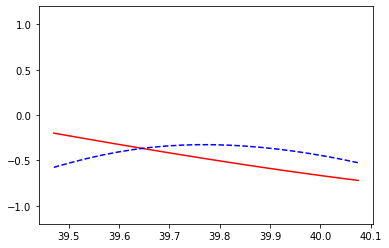

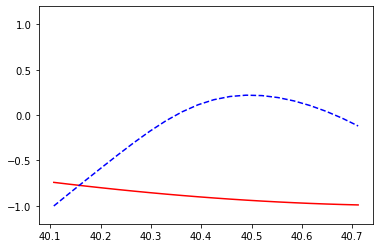

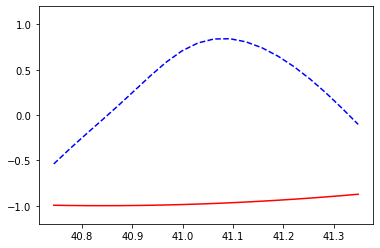

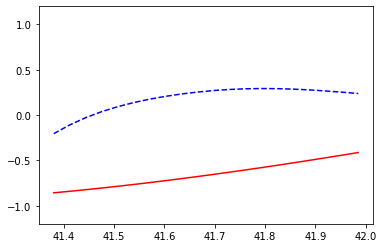

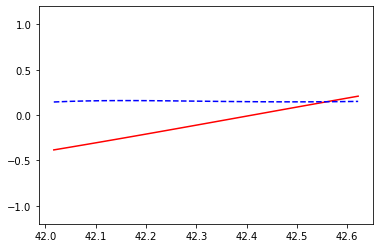

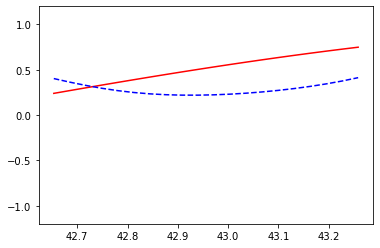

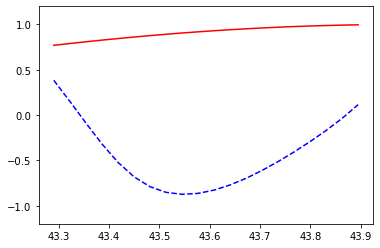

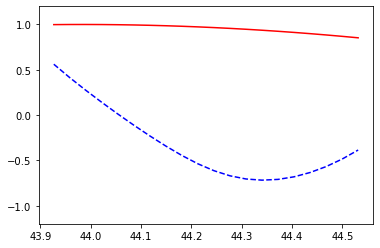

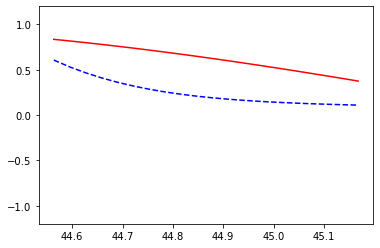

train cost:  0.06739013


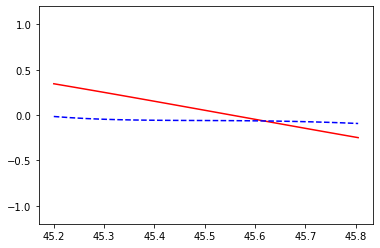

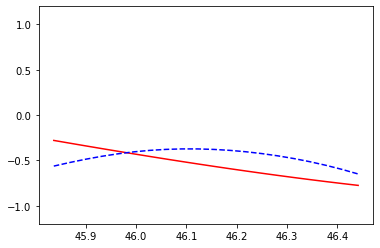

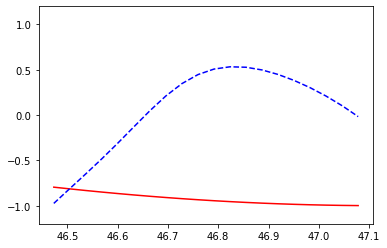

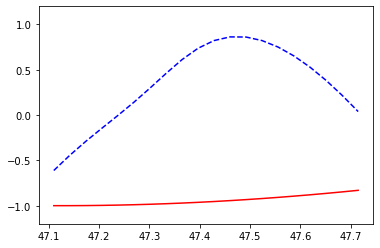

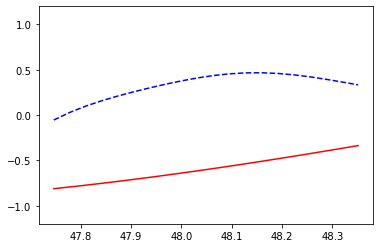

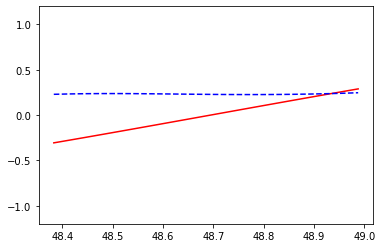

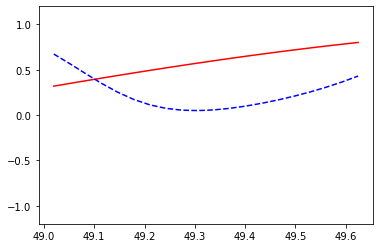

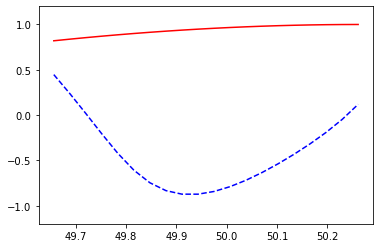

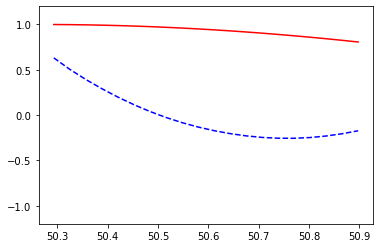

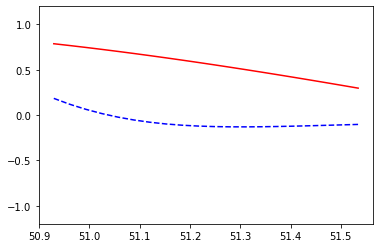

train cost:  0.065814696


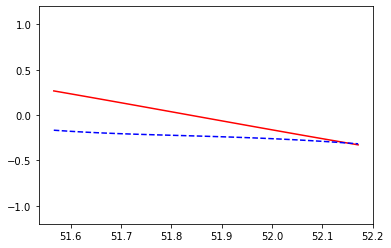

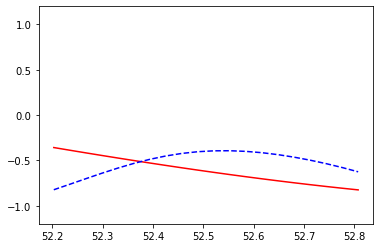

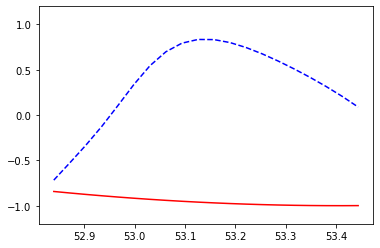

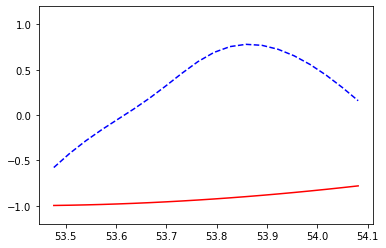

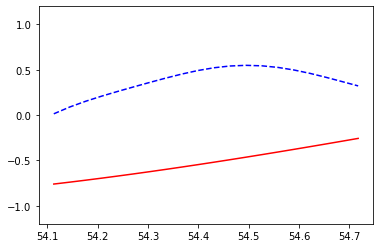

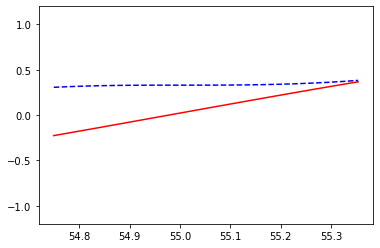

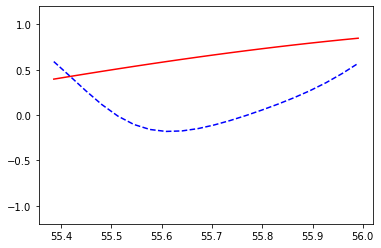

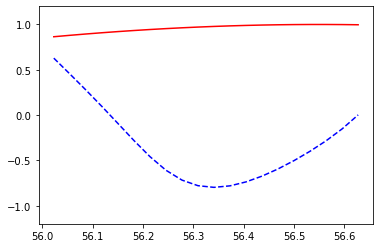

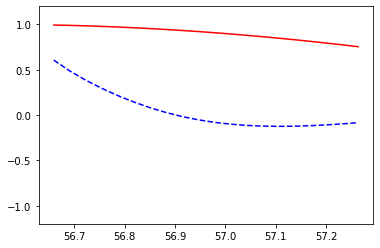

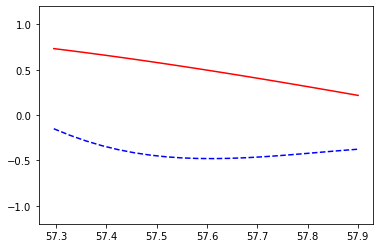

train cost:  0.06975761


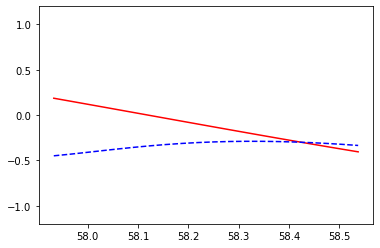

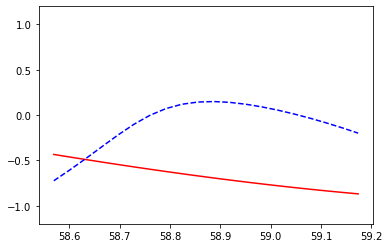

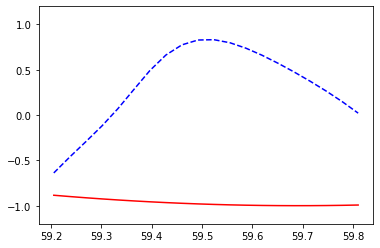

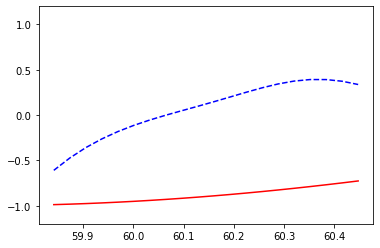

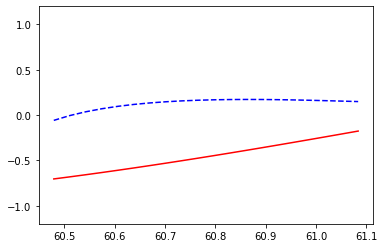

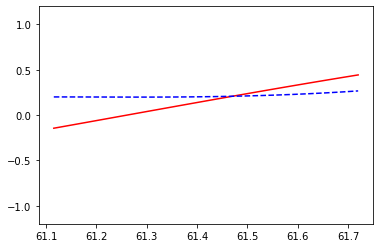

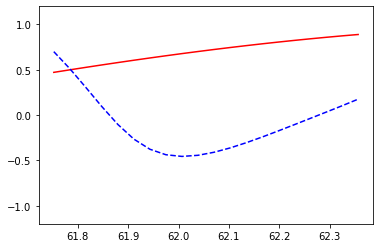

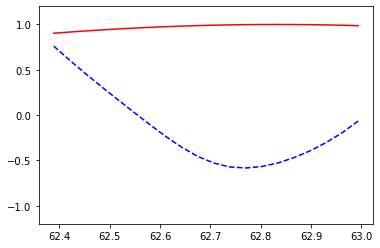

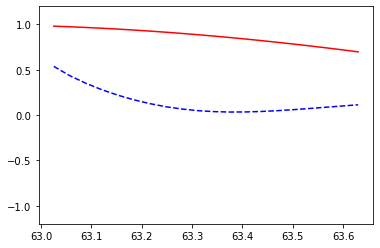

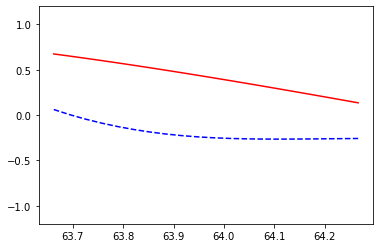

train cost:  0.09141483


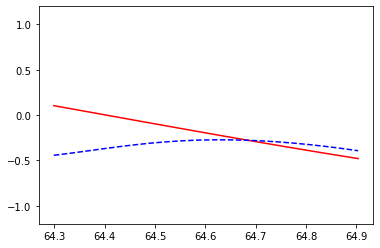

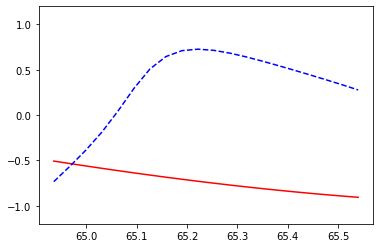

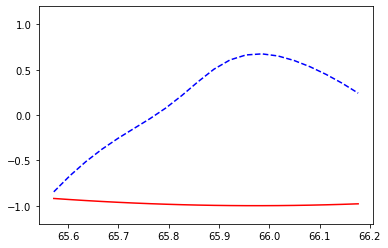

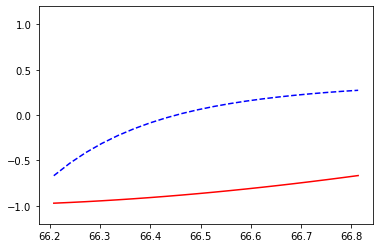

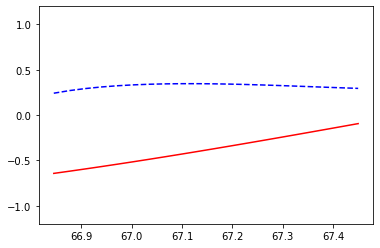

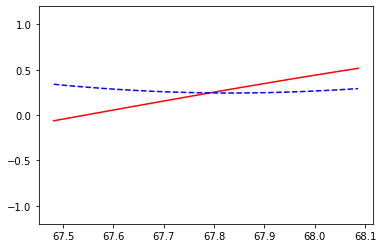

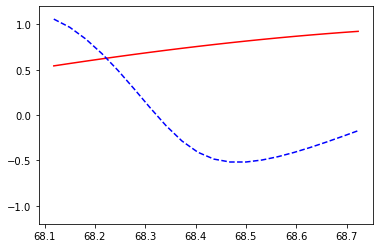

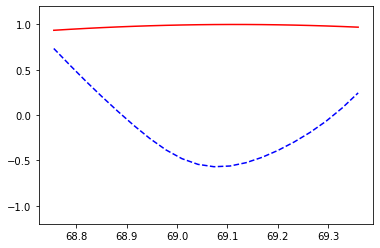

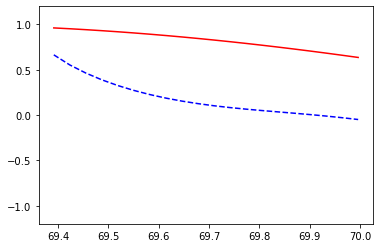

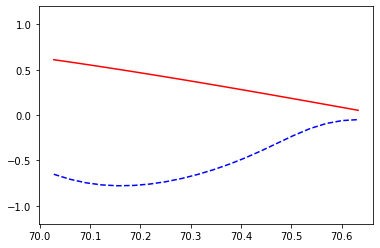

train cost:  0.18468249


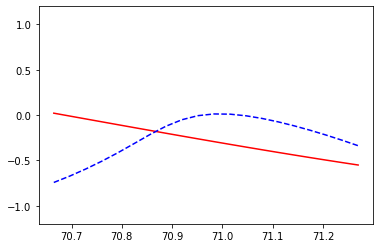

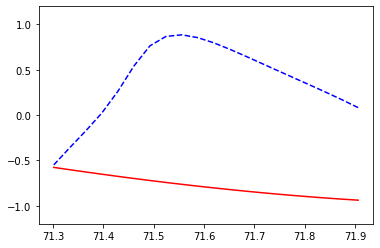

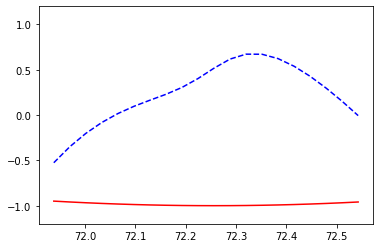

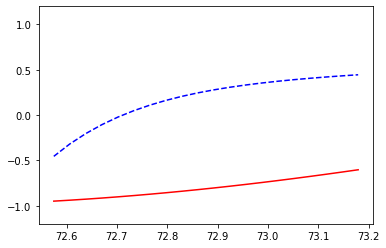

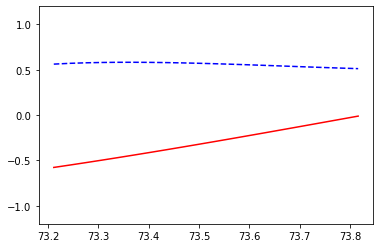

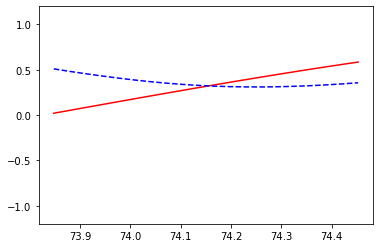

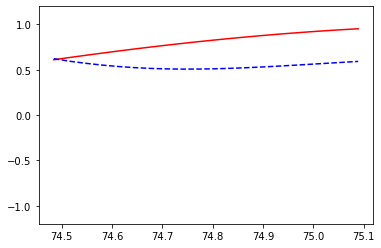

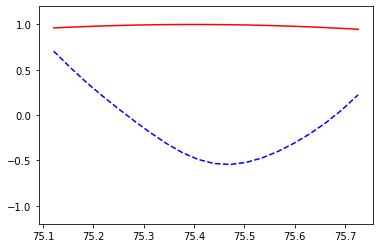

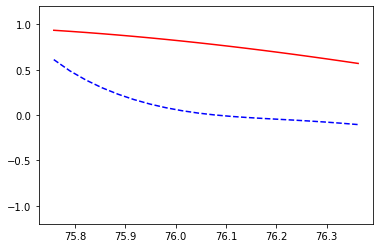

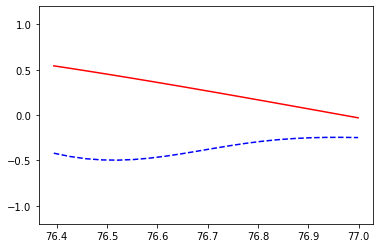

train cost:  0.13385417


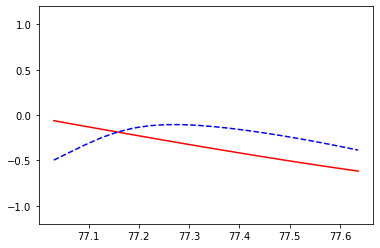

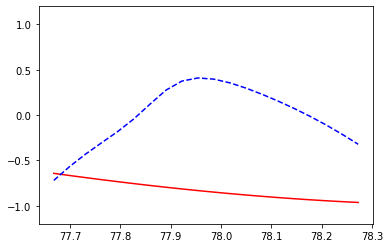

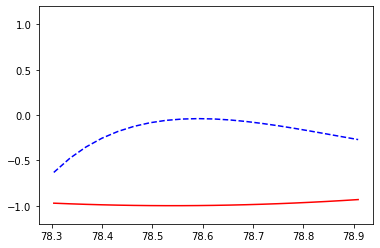

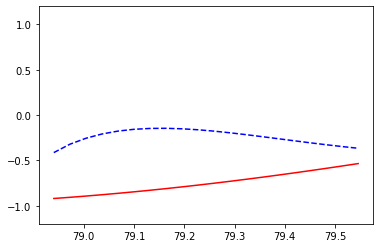

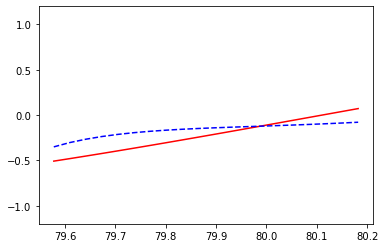

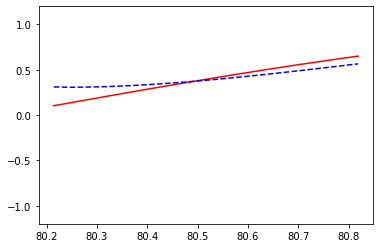

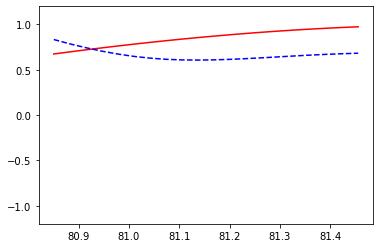

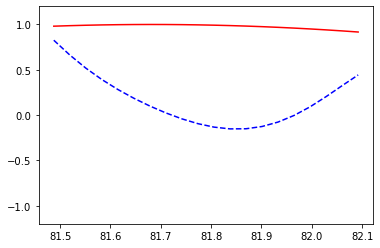

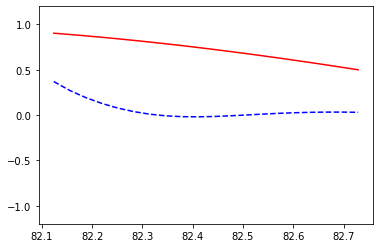

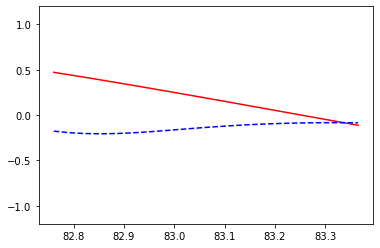

train cost:  0.05829588


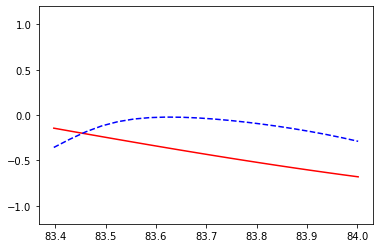

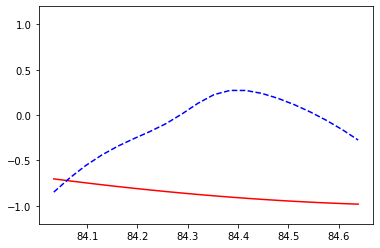

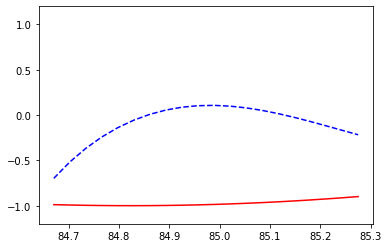

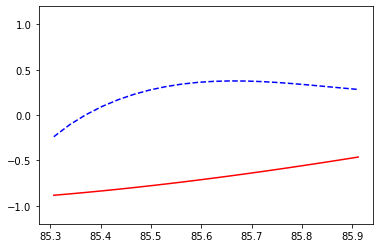

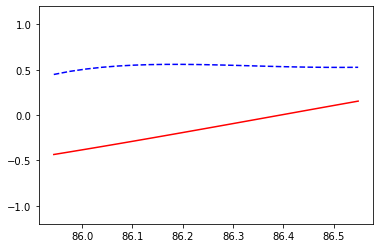

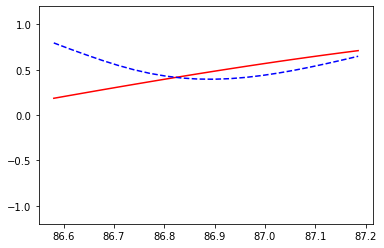

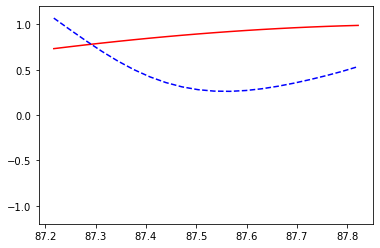

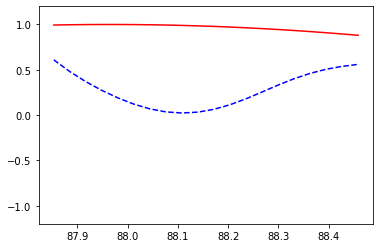

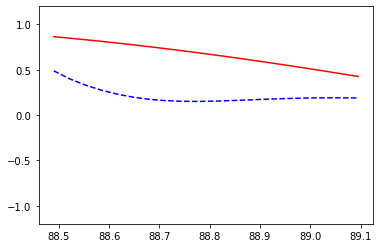

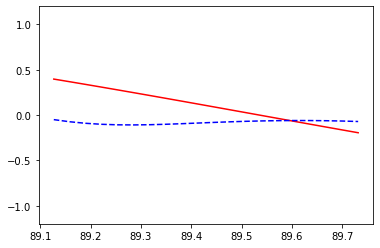

train cost:  0.05727594


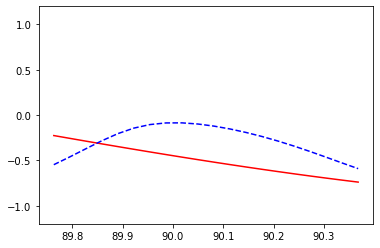

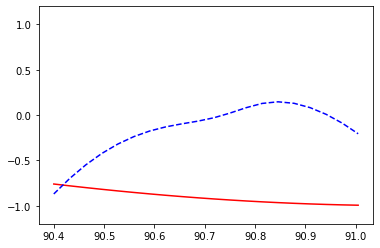

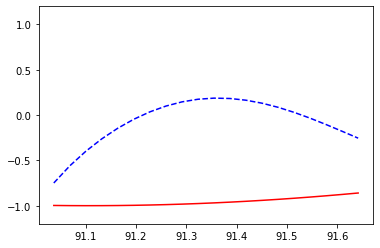

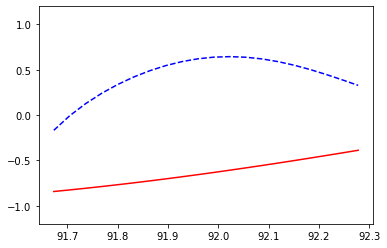

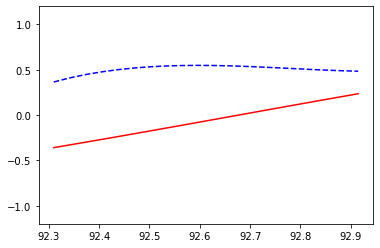

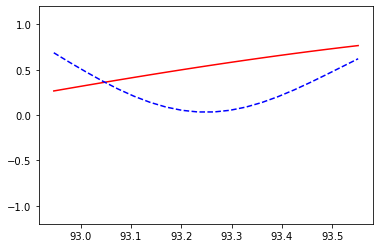

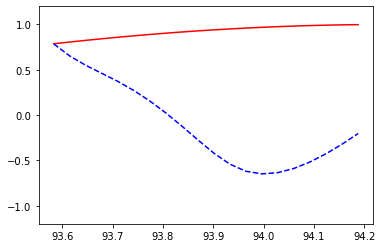

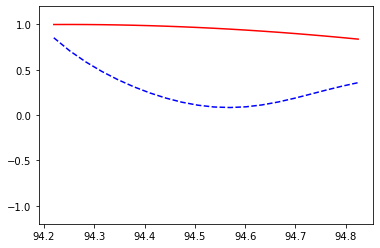

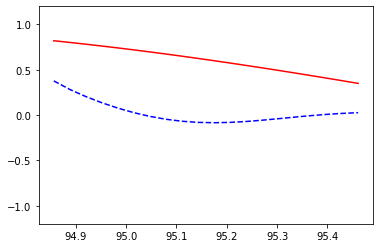

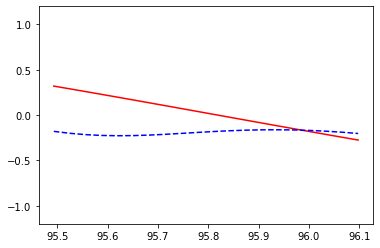

train cost:  0.03525519


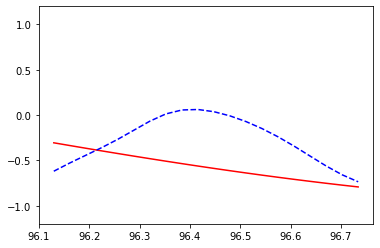

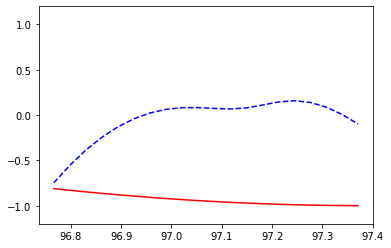

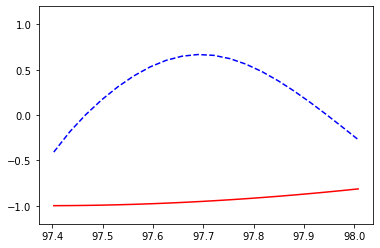

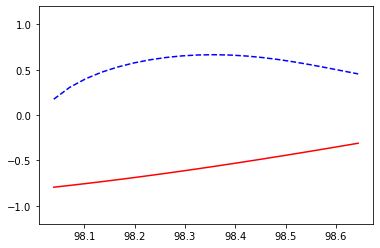

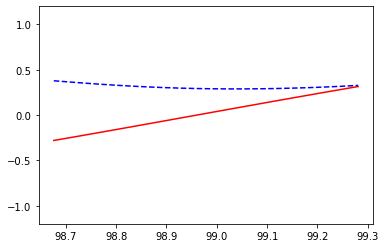

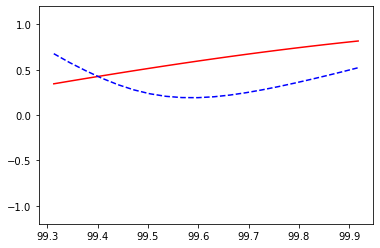

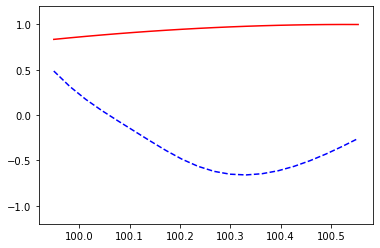

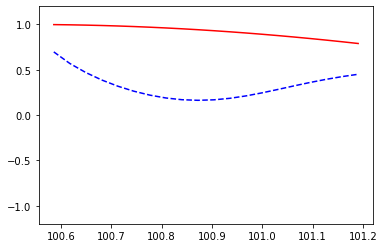

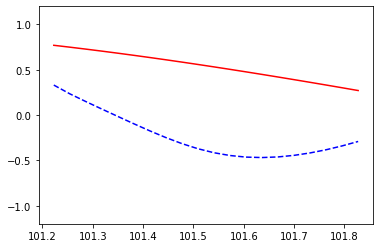

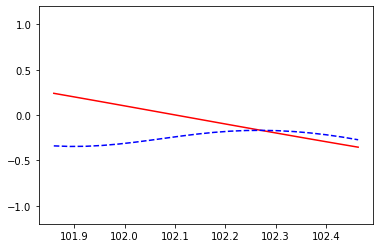

train cost:  0.0639105


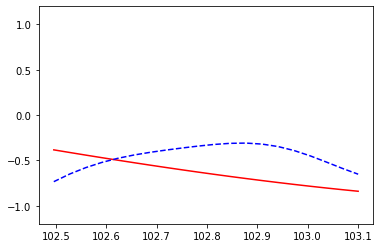

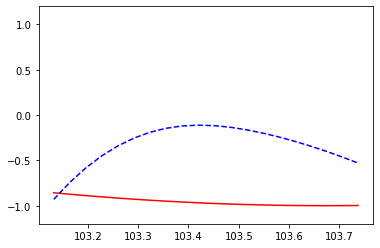

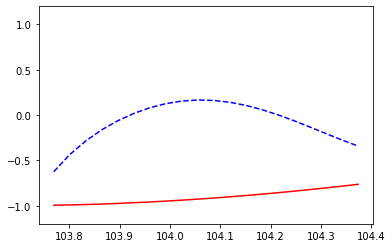

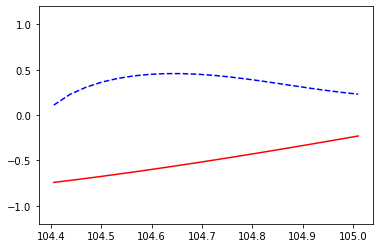

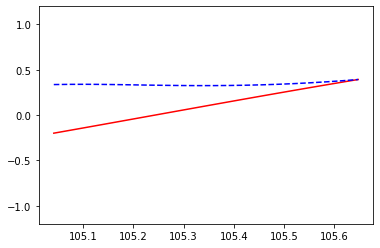

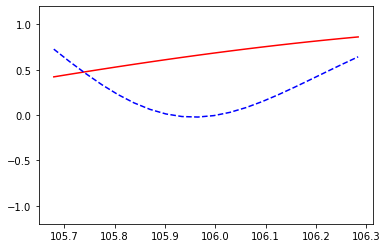

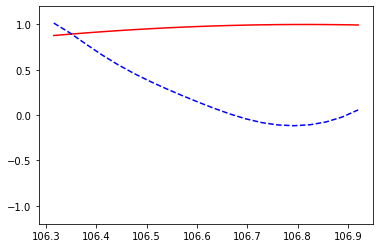

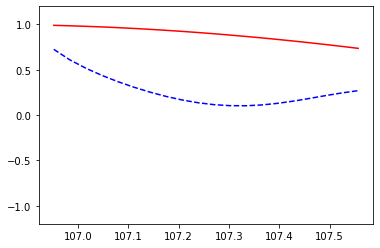

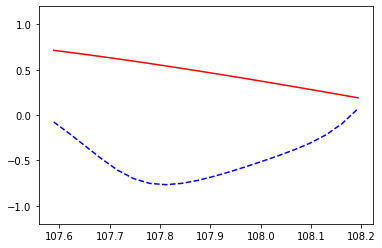

KeyboardInterrupt: 

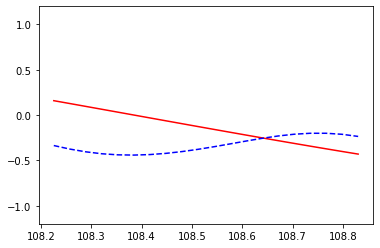

In [5]:
print('Training ------------')
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.2, 1.2))
    plt.draw()
    plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)